In [1]:
import os
import ast
import shutil
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.image as img
from ultralytics import YOLO

%matplotlib inline

In [2]:
ROOT_PATH = Path(os.getcwd()).parent.as_posix()
DATASET_PATH = Path(ROOT_PATH, "datasets/storm-damage-detection/working/sdd/sdd.yaml").as_posix()
RUN_PATH = Path(ROOT_PATH, "runs").as_posix()
PRETRAINED_PATH = Path(ROOT_PATH, "pretrained").as_posix()
TEST_INPUTS_DIR = Path(ROOT_PATH, "datasets/storm-damage-detection/working/sdd/test/images").as_posix()

## Training

In [3]:
model_name = "yolov8n.pt" # yolov8n.pt yolov8s.pt yolov8m.pt yolov8l.pt yolov8x.pt
model = YOLO(model_name, task="detect")
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients


(225, 3157200, 0, 0.0)

In [4]:
train_results = model.train(
    data=DATASET_PATH, 
    epochs=1000, 
    imgsz=512,
    project=RUN_PATH,
    name=None, # YOLOv8n default
)

New https://pypi.org/project/ultralytics/8.1.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (Tesla T4, 15978MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/sdd.yaml, epochs=1000, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=/home/jovyan/storm-damage-detection/runs, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augme

train: Scanning /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/train/labels.cache... 144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 144/144 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 34, len(boxes) = 2746. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/valid/labels.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]


Plotting labels to /home/jovyan/storm-damage-detection/runs/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to /home/jovyan/storm-damage-detection/runs/train2
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      1.91G      1.784      4.148      1.584        391        512: 100%|██████████| 9/9 [00:01<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         18        419    0.00194     0.0733     0.0149     0.0114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      1.76G      1.457      3.529      1.296        718        512: 100%|██████████| 9/9 [00:00<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]

                   all         18        419    0.00588      0.146     0.0109    0.00395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      2.01G      1.451      2.577      1.218        443        512: 100%|██████████| 9/9 [00:00<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.78it/s]

                   all         18        419     0.0453      0.449      0.183      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000       1.7G      1.399      2.073      1.181        514        512: 100%|██████████| 9/9 [00:01<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]

                   all         18        419      0.838      0.193      0.227      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      1.77G       1.39      1.842      1.173        370        512: 100%|██████████| 9/9 [00:00<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         18        419      0.671      0.243      0.219      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      1.77G      1.381      1.766       1.17        399        512: 100%|██████████| 9/9 [00:00<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         18        419      0.648      0.237      0.235       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      1.97G       1.33      1.636      1.157        439        512: 100%|██████████| 9/9 [00:00<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         18        419      0.698      0.237      0.251      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      1.74G      1.305      1.618      1.149        392        512: 100%|██████████| 9/9 [00:00<00:00, 10.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]

                   all         18        419      0.444      0.309      0.248      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      1.78G       1.28      1.546      1.152        520        512: 100%|██████████| 9/9 [00:00<00:00, 10.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         18        419      0.735      0.281      0.268      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      1.88G      1.301       1.49      1.159        560        512: 100%|██████████| 9/9 [00:00<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.57it/s]

                   all         18        419      0.176      0.551      0.275      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      1.96G      1.259      1.412       1.13        506        512: 100%|██████████| 9/9 [00:00<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         18        419      0.484      0.375      0.294      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      1.76G      1.221      1.447      1.122        337        512: 100%|██████████| 9/9 [00:00<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all         18        419      0.193      0.395      0.234      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      1.77G      1.291      1.493      1.163        283        512: 100%|██████████| 9/9 [00:00<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]

                   all         18        419       0.44       0.29      0.248      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000         2G      1.216      1.319      1.089        430        512: 100%|██████████| 9/9 [00:00<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]

                   all         18        419      0.184      0.412      0.265      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      1.93G       1.23      1.407      1.128        444        512: 100%|██████████| 9/9 [00:00<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]

                   all         18        419      0.521      0.402       0.27       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      1.62G      1.206       1.34      1.115        388        512: 100%|██████████| 9/9 [00:00<00:00, 10.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]

                   all         18        419      0.481      0.404      0.267      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      1.68G      1.191      1.371      1.119        513        512: 100%|██████████| 9/9 [00:00<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]

                   all         18        419      0.463      0.365       0.27      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      1.73G      1.158      1.225      1.084        451        512: 100%|██████████| 9/9 [00:00<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all         18        419      0.504      0.334      0.283      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      1.74G      1.187      1.271      1.102        527        512: 100%|██████████| 9/9 [00:00<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all         18        419      0.524      0.433      0.316      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000       1.7G      1.236      1.309      1.118        468        512: 100%|██████████| 9/9 [00:00<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         18        419      0.636      0.417      0.307      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      1.73G      1.224      1.311      1.133        326        512: 100%|██████████| 9/9 [00:00<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         18        419      0.582      0.404      0.296      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      1.83G      1.161      1.218      1.103        454        512: 100%|██████████| 9/9 [00:00<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


                   all         18        419      0.231      0.502      0.293      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      1.64G      1.195      1.208      1.118        415        512: 100%|██████████| 9/9 [00:00<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         18        419      0.512      0.393      0.271      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      1.68G       1.17      1.235      1.078        406        512: 100%|██████████| 9/9 [00:00<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         18        419      0.225      0.433      0.253      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000         2G      1.214      1.228      1.099        608        512: 100%|██████████| 9/9 [00:00<00:00, 10.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all         18        419      0.242      0.442      0.229      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      1.66G      1.175      1.208      1.084        308        512: 100%|██████████| 9/9 [00:00<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]

                   all         18        419      0.389      0.475       0.32      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      1.76G      1.151      1.241      1.102        299        512: 100%|██████████| 9/9 [00:00<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         18        419      0.325      0.498      0.353      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      1.83G      1.211      1.266      1.147        437        512: 100%|██████████| 9/9 [00:00<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.02it/s]

                   all         18        419      0.268      0.369      0.336      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      1.93G      1.148      1.225       1.08        555        512: 100%|██████████| 9/9 [00:00<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]

                   all         18        419      0.598      0.376      0.361      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      1.78G      1.143      1.175      1.086        392        512: 100%|██████████| 9/9 [00:00<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all         18        419      0.643      0.434      0.391      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      1.61G      1.109      1.125      1.072        335        512: 100%|██████████| 9/9 [00:00<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]

                   all         18        419      0.595      0.454       0.38      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      1.97G      1.147       1.12      1.106        394        512: 100%|██████████| 9/9 [00:00<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         18        419       0.35      0.419      0.346      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      1.71G      1.102      1.089      1.069        309        512: 100%|██████████| 9/9 [00:00<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all         18        419      0.565      0.285       0.33      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000       1.8G      1.101      1.089      1.069        707        512: 100%|██████████| 9/9 [00:00<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.09it/s]

                   all         18        419      0.312      0.371      0.318      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      1.78G      1.116      1.109      1.099        499        512: 100%|██████████| 9/9 [00:00<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.92it/s]

                   all         18        419      0.315      0.364      0.311      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000       1.7G      1.119      1.117      1.089        269        512: 100%|██████████| 9/9 [00:00<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

                   all         18        419      0.293      0.445      0.296       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      1.75G      1.107       1.12      1.078        312        512: 100%|██████████| 9/9 [00:00<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         18        419      0.354      0.511      0.348      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      1.75G      1.076      1.067      1.059        419        512: 100%|██████████| 9/9 [00:00<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

                   all         18        419      0.408      0.441      0.392      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      1.76G      1.078      1.063      1.042        424        512: 100%|██████████| 9/9 [00:00<00:00, 10.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]

                   all         18        419       0.38      0.465      0.374      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      1.82G      1.068      1.022      1.055        440        512: 100%|██████████| 9/9 [00:00<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.58it/s]

                   all         18        419      0.425      0.455      0.375      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      1.65G      1.084      1.073      1.083        574        512: 100%|██████████| 9/9 [00:00<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]

                   all         18        419       0.43      0.475      0.355      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      1.69G      1.074      1.094      1.064        509        512: 100%|██████████| 9/9 [00:00<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.45it/s]

                   all         18        419      0.287      0.522      0.336      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      1.87G      1.089      1.079      1.062        470        512: 100%|██████████| 9/9 [00:00<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all         18        419      0.402       0.43      0.378      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      1.86G      1.099      1.014      1.057        358        512: 100%|██████████| 9/9 [00:00<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

                   all         18        419      0.294      0.477      0.344      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      1.83G      1.076      1.066      1.056        607        512: 100%|██████████| 9/9 [00:00<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.75it/s]

                   all         18        419      0.398      0.498      0.432      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      1.63G      1.075      1.061      1.069        477        512: 100%|██████████| 9/9 [00:00<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.16it/s]

                   all         18        419      0.541      0.504      0.488      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      1.88G      1.095      1.088      1.087        392        512: 100%|██████████| 9/9 [00:00<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]

                   all         18        419      0.383      0.525      0.442      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000       1.8G      1.113      1.064      1.079        404        512: 100%|██████████| 9/9 [00:00<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.27it/s]

                   all         18        419      0.317      0.467      0.392      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      1.89G      1.062      0.987      1.064        413        512: 100%|██████████| 9/9 [00:00<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.38it/s]


                   all         18        419      0.292      0.552      0.371       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      2.16G      1.114      1.041      1.086        278        512: 100%|██████████| 9/9 [00:00<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]


                   all         18        419      0.312      0.549      0.353      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      1.67G      1.101       1.05      1.057        321        512: 100%|██████████| 9/9 [00:00<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.19it/s]


                   all         18        419       0.34      0.511      0.358      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      1.65G      1.084      1.008       1.07        326        512: 100%|██████████| 9/9 [00:00<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         18        419      0.333       0.53      0.401      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000       1.9G      1.087     0.9879      1.042        355        512: 100%|██████████| 9/9 [00:00<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.27it/s]


                   all         18        419      0.399      0.433      0.341       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      1.72G      1.096      1.064      1.064        335        512: 100%|██████████| 9/9 [00:00<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.09it/s]


                   all         18        419      0.536      0.383       0.36       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      1.79G      1.076      1.032      1.058        285        512: 100%|██████████| 9/9 [00:00<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.12it/s]

                   all         18        419      0.354      0.504       0.38      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      2.01G      1.164      1.066      1.107        488        512: 100%|██████████| 9/9 [00:00<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.58it/s]

                   all         18        419      0.329      0.517      0.389      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      1.79G      1.044     0.9842      1.052        363        512: 100%|██████████| 9/9 [00:00<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]


                   all         18        419      0.342      0.559      0.371      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      1.99G      1.096      1.029      1.074        368        512: 100%|██████████| 9/9 [00:00<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all         18        419      0.367      0.538      0.421      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000       1.9G      1.065     0.9601      1.048        350        512: 100%|██████████| 9/9 [00:00<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         18        419      0.378      0.508      0.409      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      1.68G      1.073     0.9872      1.069        383        512: 100%|██████████| 9/9 [00:00<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]

                   all         18        419      0.341       0.58      0.407       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      1.92G      1.069     0.9501      1.046        352        512: 100%|██████████| 9/9 [00:00<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]

                   all         18        419       0.37      0.594      0.437      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      1.71G       1.08      1.028      1.071        492        512: 100%|██████████| 9/9 [00:00<00:00, 10.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all         18        419      0.502      0.425      0.413      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      1.73G       1.04       0.95      1.038        375        512: 100%|██████████| 9/9 [00:00<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all         18        419      0.419      0.504      0.433      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      1.69G      1.061     0.9561      1.059        463        512: 100%|██████████| 9/9 [00:00<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.88it/s]

                   all         18        419      0.372      0.478      0.424      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      1.92G      1.054      1.004      1.056        250        512: 100%|██████████| 9/9 [00:00<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

                   all         18        419      0.381      0.533       0.44      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      1.93G      1.067     0.9589      1.047        493        512: 100%|██████████| 9/9 [00:00<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]

                   all         18        419      0.348      0.588      0.441      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      1.93G      1.084     0.9384      1.053        442        512: 100%|██████████| 9/9 [00:00<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all         18        419      0.447      0.546      0.437      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      2.18G      1.072     0.9414      1.041        424        512: 100%|██████████| 9/9 [00:00<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]

                   all         18        419      0.615      0.462      0.458      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      1.82G      1.066      1.007      1.061        382        512: 100%|██████████| 9/9 [00:00<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         18        419      0.526      0.392      0.397      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      1.88G      1.034     0.9958      1.053        375        512: 100%|██████████| 9/9 [00:00<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         18        419      0.534      0.391      0.388      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      1.76G      1.027     0.8988      1.044        424        512: 100%|██████████| 9/9 [00:00<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]

                   all         18        419      0.382      0.499      0.411      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      1.84G       1.05     0.9366      1.049        383        512: 100%|██████████| 9/9 [00:00<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]

                   all         18        419      0.401      0.451      0.368      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      1.85G      1.059      1.022       1.07        308        512: 100%|██████████| 9/9 [00:00<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.47it/s]

                   all         18        419      0.479      0.365      0.373      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      1.84G      1.035      1.002      1.024        456        512: 100%|██████████| 9/9 [00:00<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]

                   all         18        419       0.32      0.508       0.37       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      1.76G      1.074     0.9674      1.068        373        512: 100%|██████████| 9/9 [00:00<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all         18        419      0.362      0.443       0.36      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      1.64G      1.099     0.9786      1.068        387        512: 100%|██████████| 9/9 [00:00<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]

                   all         18        419      0.251      0.599       0.38      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      1.76G      1.018     0.9152      1.048        435        512: 100%|██████████| 9/9 [00:00<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]

                   all         18        419      0.313      0.481      0.383      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      1.65G      1.086     0.9454      1.084        319        512: 100%|██████████| 9/9 [00:00<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]

                   all         18        419       0.31      0.531        0.4      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000       1.9G      1.075      0.909      1.062        404        512: 100%|██████████| 9/9 [00:00<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]

                   all         18        419      0.398      0.463      0.403      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      1.85G      1.058     0.8874      1.053        307        512: 100%|██████████| 9/9 [00:00<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.51it/s]

                   all         18        419       0.45       0.43      0.393      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      1.81G      1.016     0.8574      1.036        398        512: 100%|██████████| 9/9 [00:00<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]


                   all         18        419      0.437      0.452      0.418      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      1.81G      1.026     0.8502      1.032        455        512: 100%|██████████| 9/9 [00:00<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all         18        419      0.305      0.583      0.372      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      1.83G     0.9881     0.9046      1.028        522        512: 100%|██████████| 9/9 [00:00<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


                   all         18        419      0.342      0.585      0.381      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      1.74G      1.005     0.8877      1.031        416        512: 100%|██████████| 9/9 [00:00<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         18        419      0.352      0.621      0.415      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      1.96G     0.9835     0.8508      1.015        396        512: 100%|██████████| 9/9 [00:00<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         18        419      0.324      0.665      0.414       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      1.87G     0.9845      0.856      1.019        567        512: 100%|██████████| 9/9 [00:00<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]

                   all         18        419      0.487      0.468      0.457      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      1.81G      1.026     0.8953      1.047        430        512: 100%|██████████| 9/9 [00:00<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all         18        419      0.416      0.501      0.435      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      1.71G     0.9807     0.8714      1.016        349        512: 100%|██████████| 9/9 [00:00<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]

                   all         18        419      0.355      0.576      0.418      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      1.61G     0.9992     0.9045      1.041        502        512: 100%|██████████| 9/9 [00:00<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.45it/s]


                   all         18        419      0.352      0.534      0.357      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      1.84G     0.9925     0.8887      1.025        456        512: 100%|██████████| 9/9 [00:00<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         18        419      0.359      0.532      0.391      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      1.87G      1.015     0.8546      1.036        381        512: 100%|██████████| 9/9 [00:00<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]

                   all         18        419      0.357      0.521      0.419      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      1.81G      1.012      0.869      1.031        369        512: 100%|██████████| 9/9 [00:00<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.30it/s]

                   all         18        419      0.319      0.531      0.399      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      1.62G      1.053     0.9205      1.053        297        512: 100%|██████████| 9/9 [00:00<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]

                   all         18        419      0.318      0.516      0.381      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000       1.9G      1.027     0.8742       1.03        413        512: 100%|██████████| 9/9 [00:00<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         18        419       0.37      0.502      0.403      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      1.96G     0.9833     0.8454      1.027        392        512: 100%|██████████| 9/9 [00:00<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.87it/s]

                   all         18        419      0.375      0.527      0.431      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      1.93G      1.039     0.8619      1.039        487        512: 100%|██████████| 9/9 [00:00<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]

                   all         18        419      0.356      0.447      0.404      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      1.65G     0.9551     0.8634      1.013        234        512: 100%|██████████| 9/9 [00:00<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all         18        419      0.375       0.59      0.454      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      1.88G     0.9943     0.8355      1.024        448        512: 100%|██████████| 9/9 [00:00<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all         18        419        0.4      0.644      0.495      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      1.62G      1.016     0.8168      1.042        398        512: 100%|██████████| 9/9 [00:00<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.41it/s]

                   all         18        419       0.58      0.461      0.508      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000       1.6G      1.015     0.8422      1.039        410        512: 100%|██████████| 9/9 [00:00<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         18        419      0.307      0.536      0.392      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      1.83G     0.9566     0.8019      1.004        457        512: 100%|██████████| 9/9 [00:00<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         18        419      0.294      0.516      0.364      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      1.82G     0.9822     0.8386      1.025        463        512: 100%|██████████| 9/9 [00:00<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.76it/s]

                   all         18        419      0.373      0.421      0.358      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      1.77G     0.9898     0.8515       1.03        295        512: 100%|██████████| 9/9 [00:00<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.11it/s]

                   all         18        419      0.359      0.552      0.391      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      1.81G      1.014      0.862       1.04        432        512: 100%|██████████| 9/9 [00:00<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         18        419      0.326      0.435      0.348      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      1.98G      1.027      0.825      1.048        572        512: 100%|██████████| 9/9 [00:00<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]

                   all         18        419      0.309        0.4      0.344      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000       1.6G       0.99     0.8275      1.034        317        512: 100%|██████████| 9/9 [00:00<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]

                   all         18        419       0.28      0.381      0.312      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      1.76G      1.022       0.84      1.039        404        512: 100%|██████████| 9/9 [00:00<00:00, 10.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.89it/s]

                   all         18        419       0.33      0.372      0.317      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      1.86G     0.9777     0.8085      1.031        442        512: 100%|██████████| 9/9 [00:00<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]

                   all         18        419      0.305      0.468      0.345       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      1.96G     0.9795     0.7937      1.028        397        512: 100%|██████████| 9/9 [00:00<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         18        419      0.326      0.453      0.354      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      1.72G     0.9663     0.7832      1.016        450        512: 100%|██████████| 9/9 [00:00<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.53it/s]


                   all         18        419      0.384      0.522      0.387      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      1.65G      1.053     0.8171      1.041        518        512: 100%|██████████| 9/9 [00:00<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         18        419      0.429      0.421      0.397      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000       1.6G     0.9953      0.848      1.039        442        512: 100%|██████████| 9/9 [00:00<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         18        419      0.346      0.478      0.354      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      1.84G      1.008     0.8198      1.029        447        512: 100%|██████████| 9/9 [00:00<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]

                   all         18        419      0.327      0.562      0.377      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      1.64G     0.9988      0.813      1.031        381        512: 100%|██████████| 9/9 [00:00<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         18        419      0.474      0.422      0.393      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      1.59G     0.9752     0.7875      1.009        410        512: 100%|██████████| 9/9 [00:00<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         18        419      0.462      0.392       0.39      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      1.97G      1.008     0.8455      1.031        369        512: 100%|██████████| 9/9 [00:00<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.58it/s]

                   all         18        419      0.384      0.401      0.379      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000       1.9G     0.9755     0.8134      1.009        378        512: 100%|██████████| 9/9 [00:00<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.83it/s]

                   all         18        419      0.349      0.502      0.361      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      1.84G     0.9589     0.8102          1        404        512: 100%|██████████| 9/9 [00:00<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]

                   all         18        419      0.307       0.54      0.371      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      1.76G     0.9591     0.7565      1.004        548        512: 100%|██████████| 9/9 [00:00<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.82it/s]

                   all         18        419      0.349      0.453      0.372      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      2.27G      0.962     0.7635     0.9919        559        512: 100%|██████████| 9/9 [00:00<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.96it/s]

                   all         18        419      0.301      0.499      0.313      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      2.01G      1.008     0.7974      1.015        418        512: 100%|██████████| 9/9 [00:00<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         18        419      0.319      0.502      0.354      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      1.69G     0.9665     0.7529      1.012        496        512: 100%|██████████| 9/9 [00:00<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]

                   all         18        419      0.312      0.569      0.358       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      1.89G     0.9708     0.7778      1.011        384        512: 100%|██████████| 9/9 [00:00<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]

                   all         18        419      0.308      0.494      0.349      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      1.85G      0.974     0.7966      1.015        410        512: 100%|██████████| 9/9 [00:00<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.02it/s]

                   all         18        419      0.329      0.406      0.305      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      1.93G     0.9508     0.7454      1.005        569        512: 100%|██████████| 9/9 [00:00<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.84it/s]

                   all         18        419      0.356      0.395       0.33      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      1.61G     0.9659     0.7454      1.009        515        512: 100%|██████████| 9/9 [00:00<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.24it/s]

                   all         18        419       0.35       0.54      0.349      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      1.93G     0.9307     0.7661      1.007        363        512: 100%|██████████| 9/9 [00:00<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]

                   all         18        419      0.346      0.503       0.36      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      1.84G     0.9487     0.7711     0.9927        444        512: 100%|██████████| 9/9 [00:00<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         18        419      0.388      0.455      0.347      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      1.63G     0.9693     0.7731      1.016        549        512: 100%|██████████| 9/9 [00:00<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]


                   all         18        419      0.369      0.583      0.416      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      1.82G     0.9607     0.7362      1.002        559        512: 100%|██████████| 9/9 [00:00<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all         18        419      0.485      0.538      0.453      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      1.77G     0.9352     0.7557      1.003        533        512: 100%|██████████| 9/9 [00:00<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.72it/s]


                   all         18        419      0.481      0.507      0.447      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000       1.8G     0.9578     0.8094       1.03        439        512: 100%|██████████| 9/9 [00:00<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]

                   all         18        419      0.421      0.481      0.396      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      1.63G      0.949     0.7661     0.9985        389        512: 100%|██████████| 9/9 [00:00<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.88it/s]

                   all         18        419      0.393      0.489      0.377      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      1.77G      0.946     0.7526     0.9997        426        512: 100%|██████████| 9/9 [00:00<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.49it/s]


                   all         18        419      0.445      0.438      0.388      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      2.05G     0.9965     0.7833       1.01        581        512: 100%|██████████| 9/9 [00:00<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]

                   all         18        419      0.382      0.528      0.399      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      1.78G     0.9562     0.7389     0.9932        421        512: 100%|██████████| 9/9 [00:00<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all         18        419      0.437      0.474       0.38      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      1.88G     0.9512     0.7491      1.003        440        512: 100%|██████████| 9/9 [00:00<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.56it/s]

                   all         18        419      0.396      0.542       0.39       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      1.73G     0.9483     0.7233      1.019        443        512: 100%|██████████| 9/9 [00:00<00:00, 10.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]


                   all         18        419      0.365        0.5      0.425      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      1.65G     0.9442     0.7288      1.002        575        512: 100%|██████████| 9/9 [00:00<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]


                   all         18        419      0.426      0.501      0.421      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      1.64G     0.9484     0.7234      1.002        385        512: 100%|██████████| 9/9 [00:00<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.32it/s]

                   all         18        419      0.389      0.543      0.399      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      1.67G     0.9298     0.7003      1.007        395        512: 100%|██████████| 9/9 [00:00<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.51it/s]


                   all         18        419      0.406       0.43      0.412      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      1.89G     0.9531     0.7345      1.008        366        512: 100%|██████████| 9/9 [00:00<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all         18        419      0.363      0.514      0.435      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      1.85G     0.9506     0.7108     0.9962        379        512: 100%|██████████| 9/9 [00:00<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all         18        419      0.397      0.482       0.44      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      1.71G     0.9563     0.7172      1.004        361        512: 100%|██████████| 9/9 [00:00<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         18        419      0.411      0.382      0.408       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      1.76G     0.9223     0.7126     0.9971        474        512: 100%|██████████| 9/9 [00:00<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.15it/s]


                   all         18        419      0.371      0.512      0.379      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      1.85G     0.9228      0.692     0.9933        352        512: 100%|██████████| 9/9 [00:00<00:00, 10.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all         18        419      0.415      0.462      0.396      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      1.63G     0.9231     0.7176     0.9934        460        512: 100%|██████████| 9/9 [00:00<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         18        419      0.422      0.387       0.36      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000       1.7G     0.9347      0.744      1.001        287        512: 100%|██████████| 9/9 [00:00<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all         18        419      0.358      0.453       0.34      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000       1.8G     0.9426     0.7134     0.9969        395        512: 100%|██████████| 9/9 [00:00<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]


                   all         18        419      0.422      0.515      0.369      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      1.83G      0.899     0.6847      0.972        439        512: 100%|██████████| 9/9 [00:00<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all         18        419      0.292      0.584      0.366      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      1.72G     0.9359     0.7287     0.9927        450        512: 100%|██████████| 9/9 [00:00<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]

                   all         18        419      0.355      0.579      0.375      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      1.84G     0.9322      0.726     0.9969        409        512: 100%|██████████| 9/9 [00:00<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.38it/s]

                   all         18        419      0.381      0.488      0.372       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      1.72G     0.9446     0.7284          1        300        512: 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]


                   all         18        419      0.293      0.563      0.366      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      1.79G     0.9386     0.7085      1.001        417        512: 100%|██████████| 9/9 [00:00<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.81it/s]

                   all         18        419      0.375      0.405      0.373      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      1.74G     0.9553     0.7647       1.02        315        512: 100%|██████████| 9/9 [00:00<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.84it/s]

                   all         18        419      0.325       0.44      0.374      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      1.95G     0.9371     0.7019     0.9976        330        512: 100%|██████████| 9/9 [00:00<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.45it/s]

                   all         18        419      0.481      0.388      0.391      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      1.76G     0.9032      0.672      0.976        415        512: 100%|██████████| 9/9 [00:00<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         18        419      0.377      0.449      0.389      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      1.73G     0.9332     0.6908     0.9953        356        512: 100%|██████████| 9/9 [00:00<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.63it/s]


                   all         18        419      0.439      0.393      0.425       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      1.67G     0.9484     0.7224      1.009        334        512: 100%|██████████| 9/9 [00:00<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]

                   all         18        419      0.335      0.587      0.397      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      1.75G     0.9072      0.693      0.985        563        512: 100%|██████████| 9/9 [00:00<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all         18        419      0.686      0.391      0.421      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      1.79G      0.898     0.7098     0.9973        413        512: 100%|██████████| 9/9 [00:00<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]


                   all         18        419      0.411      0.382      0.407      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000      1.61G     0.8974     0.6799     0.9825        347        512: 100%|██████████| 9/9 [00:00<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]


                   all         18        419      0.364      0.505      0.405      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      1.77G     0.8962     0.6651     0.9777        395        512: 100%|██████████| 9/9 [00:00<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]

                   all         18        419      0.383      0.523      0.451      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      1.73G     0.9223     0.6861     0.9849        543        512: 100%|██████████| 9/9 [00:00<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all         18        419      0.364      0.563      0.428      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000       1.8G      0.891      0.672     0.9849        337        512: 100%|██████████| 9/9 [00:00<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all         18        419      0.407      0.448      0.407      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000      1.94G     0.9192     0.6729     0.9779        497        512: 100%|██████████| 9/9 [00:00<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]


                   all         18        419      0.341      0.495      0.389      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000      1.77G     0.8963      0.678     0.9818        275        512: 100%|██████████| 9/9 [00:00<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.56it/s]

                   all         18        419      0.311      0.587      0.358      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000       1.7G     0.9111     0.6713      0.987        500        512: 100%|██████████| 9/9 [00:00<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]

                   all         18        419      0.415      0.415      0.345      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      1.76G     0.8822     0.6456      0.974        485        512: 100%|██████████| 9/9 [00:00<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.27it/s]


                   all         18        419      0.334      0.566      0.366       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      1.74G     0.9128     0.6731     0.9914        447        512: 100%|██████████| 9/9 [00:00<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.09it/s]

                   all         18        419      0.405      0.459      0.373      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      1.76G     0.9038     0.6654     0.9889        471        512: 100%|██████████| 9/9 [00:00<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]

                   all         18        419       0.32      0.576      0.373       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000      1.83G     0.9066     0.6883     0.9779        442        512: 100%|██████████| 9/9 [00:00<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.93it/s]

                   all         18        419      0.457      0.366      0.393      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000      1.85G     0.9295     0.7084     0.9979        199        512: 100%|██████████| 9/9 [00:00<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]

                   all         18        419      0.332      0.614      0.405      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000       1.6G     0.8928     0.6761     0.9869        355        512: 100%|██████████| 9/9 [00:00<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]

                   all         18        419      0.364       0.59      0.422      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   175/1000      2.16G     0.8819      0.663     0.9791        383        512: 100%|██████████| 9/9 [00:00<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]

                   all         18        419      0.395      0.543      0.444      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   176/1000      1.71G     0.8895     0.6583     0.9822        259        512: 100%|██████████| 9/9 [00:00<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.98it/s]

                   all         18        419      0.368      0.444       0.35      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   177/1000      1.76G     0.9115     0.6979     0.9857        490        512: 100%|██████████| 9/9 [00:00<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.63it/s]


                   all         18        419      0.315      0.402      0.324      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   178/1000      1.73G     0.8955     0.6683     0.9857        471        512: 100%|██████████| 9/9 [00:00<00:00, 10.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.28it/s]

                   all         18        419      0.327      0.531      0.349      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   179/1000      1.75G     0.8735     0.6476      0.967        432        512: 100%|██████████| 9/9 [00:00<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]


                   all         18        419      0.309      0.535      0.355      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   180/1000      1.72G     0.9052     0.6668     0.9895        380        512: 100%|██████████| 9/9 [00:00<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]

                   all         18        419      0.259      0.524      0.347      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   181/1000      1.93G     0.9086     0.6527     0.9764        239        512: 100%|██████████| 9/9 [00:00<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.14it/s]


                   all         18        419      0.269      0.452      0.332      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   182/1000      1.76G     0.8919     0.6277     0.9814        460        512: 100%|██████████| 9/9 [00:00<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.50it/s]

                   all         18        419      0.564      0.346      0.327      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   183/1000      1.62G     0.8928     0.6419      0.969        419        512: 100%|██████████| 9/9 [00:00<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.21it/s]

                   all         18        419      0.351      0.316       0.32      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   184/1000      1.66G      0.907     0.6803     0.9845        432        512: 100%|██████████| 9/9 [00:00<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]

                   all         18        419      0.324      0.391      0.332      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   185/1000      1.86G     0.8591     0.6333     0.9734        594        512: 100%|██████████| 9/9 [00:00<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         18        419      0.378      0.423      0.372      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   186/1000       1.9G     0.9024     0.6548     0.9801        559        512: 100%|██████████| 9/9 [00:00<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.84it/s]


                   all         18        419      0.508       0.39      0.375      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   187/1000      1.82G     0.8934     0.6417     0.9754        377        512: 100%|██████████| 9/9 [00:00<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.73it/s]

                   all         18        419      0.557      0.418      0.443      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   188/1000      1.69G     0.9371     0.6544     0.9921        413        512: 100%|██████████| 9/9 [00:00<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.53it/s]

                   all         18        419      0.508      0.436      0.434      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   189/1000      1.68G     0.8917     0.6407     0.9684        541        512: 100%|██████████| 9/9 [00:00<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]


                   all         18        419      0.388      0.521      0.436        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   190/1000      1.71G     0.9122     0.6481     0.9843        309        512: 100%|██████████| 9/9 [00:00<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all         18        419       0.41      0.507      0.438      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   191/1000      1.74G     0.9152     0.6764     0.9899        461        512: 100%|██████████| 9/9 [00:00<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         18        419      0.399      0.537      0.388      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   192/1000      1.67G     0.9247     0.6996     0.9911        410        512: 100%|██████████| 9/9 [00:00<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]

                   all         18        419      0.388      0.656      0.439      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   193/1000      1.75G      0.892     0.6595     0.9803        311        512: 100%|██████████| 9/9 [00:00<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.02it/s]

                   all         18        419      0.466      0.501      0.432      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   194/1000      1.67G     0.8839     0.6441     0.9925        444        512: 100%|██████████| 9/9 [00:00<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         18        419      0.403      0.473      0.436      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   195/1000      1.69G     0.9001     0.6726     0.9925        447        512: 100%|██████████| 9/9 [00:00<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]


                   all         18        419      0.498      0.377      0.406      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   196/1000      1.89G     0.9145      0.681     0.9793        515        512: 100%|██████████| 9/9 [00:00<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]

                   all         18        419      0.337      0.519      0.378      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   197/1000      1.78G     0.9053      0.661     0.9873        392        512: 100%|██████████| 9/9 [00:00<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.56it/s]


                   all         18        419      0.338      0.564      0.363      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   198/1000      1.95G     0.8612     0.6231     0.9548        370        512: 100%|██████████| 9/9 [00:00<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.32it/s]

                   all         18        419      0.363      0.521      0.385       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   199/1000      1.67G      0.856     0.6309      0.972        611        512: 100%|██████████| 9/9 [00:00<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

                   all         18        419      0.387      0.473      0.383      0.277
Stopping training early as no improvement observed in last 100 epochs. Best results observed at epoch 99, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



199 epochs completed in 0.074 hours.
Optimizer stripped from /home/jovyan/storm-damage-detection/runs/train2/weights/last.pt, 6.3MB
Optimizer stripped from /home/jovyan/storm-damage-detection/runs/train2/weights/best.pt, 6.2MB

Validating /home/jovyan/storm-damage-detection/runs/train2/weights/best.pt...
Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (Tesla T4, 15978MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]


                   all         18        419      0.577      0.461      0.508      0.354
{0: 'damagedcommercialbuilding'}         18          9       0.91      0.333      0.497      0.324
{1: 'damagedresidentialbuilding'}         18         42      0.499      0.238      0.386      0.245
{2: 'undamagedcommercialbuilding'}         18         23      0.209      0.348      0.254      0.179
{3: 'undamagedresidentialbuilding'}         18        345      0.689      0.925      0.895      0.669
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /home/jovyan/storm-damage-detection/runs/train2


## Evaluation

In [6]:
# Getting some paths right
save_dir = train_results.save_dir

In [8]:
print(f"mAP with IoU 50% = {train_results.box.map50}") 
# 0.4573403929058053
# 0.507758221077064

mAP with IoU 50% = 0.507758221077064


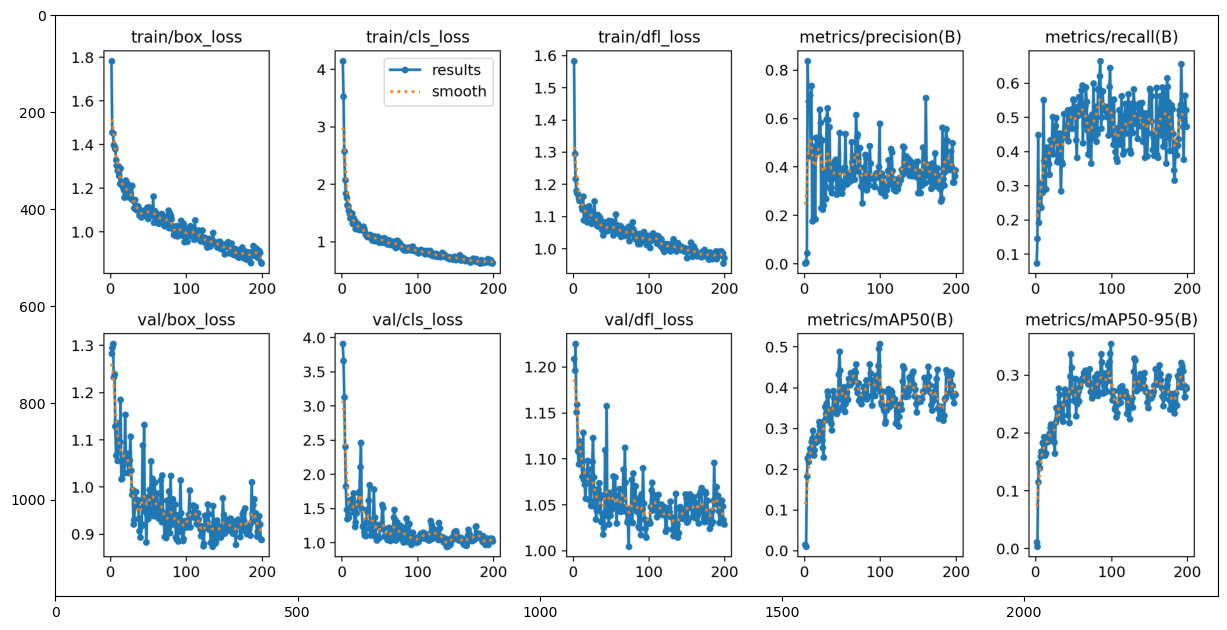

In [9]:
plt.figure(figsize=(15, 10))
results = img.imread(Path(save_dir, "results.png"))   
plt.imshow(results) 
plt.show()

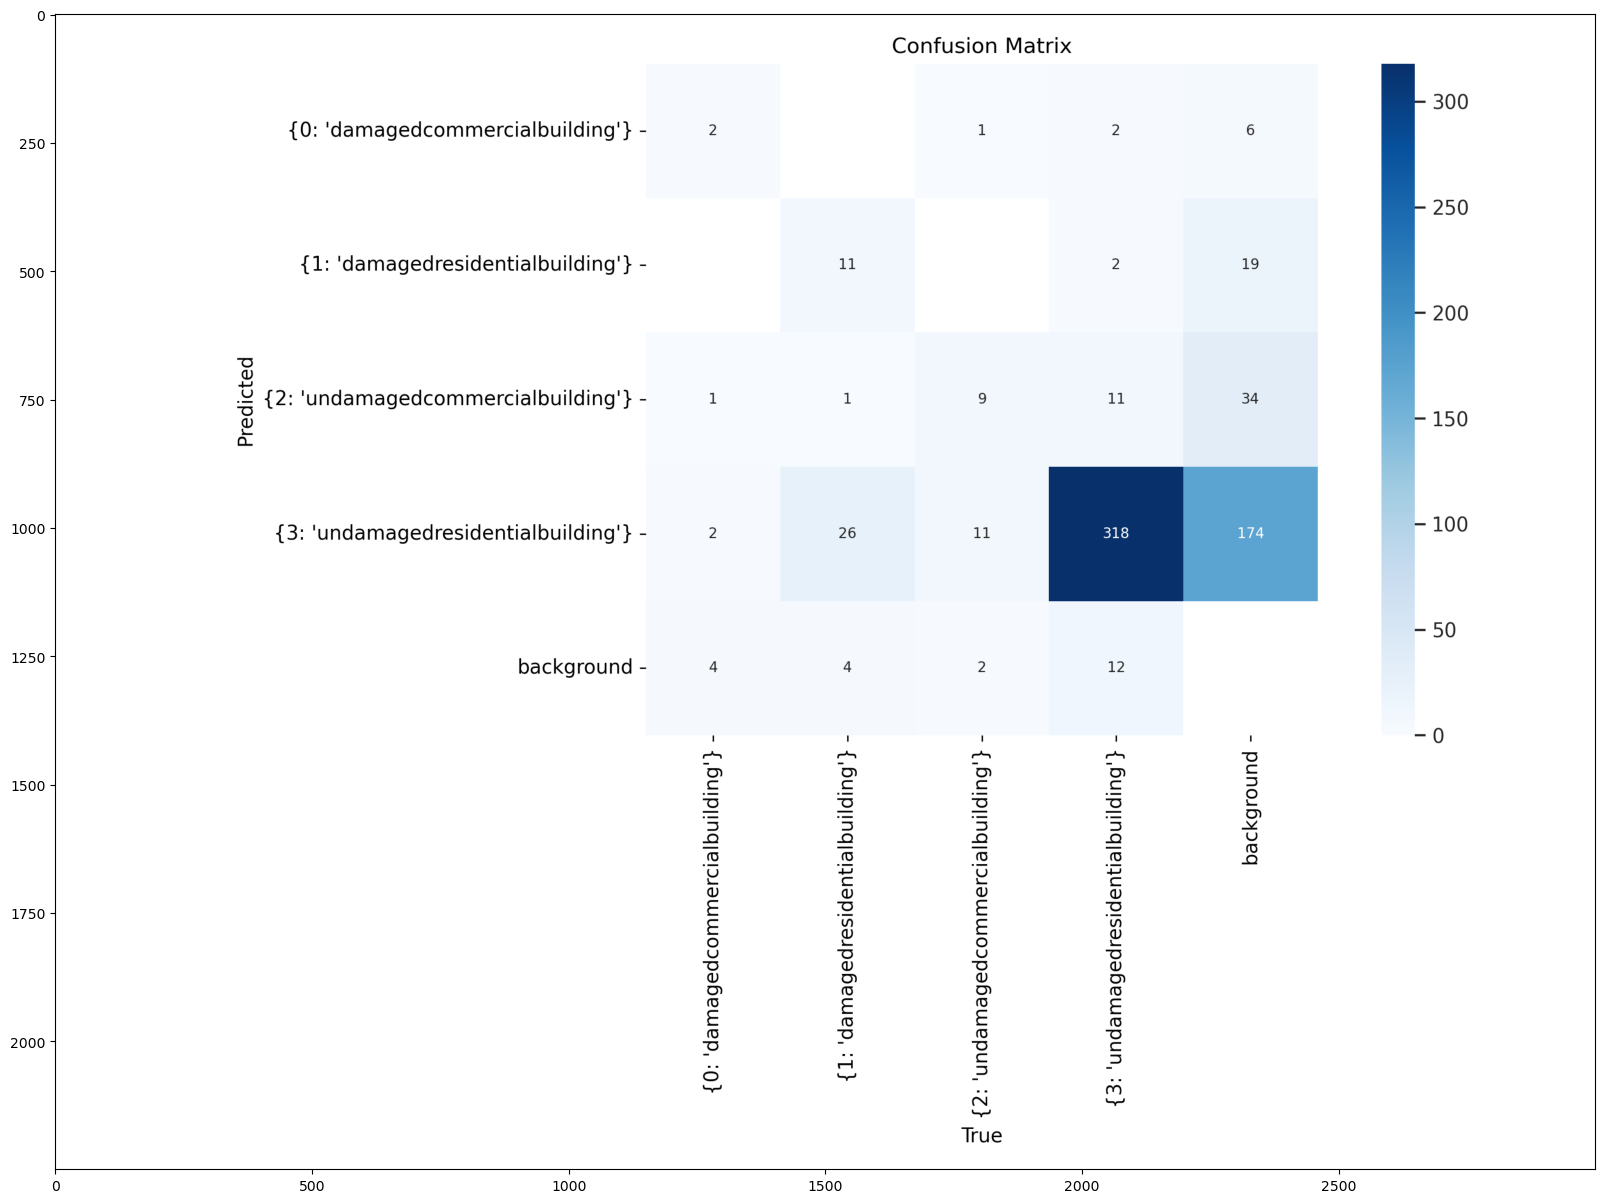

In [10]:
plt.figure(figsize=(20,15))  
# reading the image 
cf = img.imread(Path(save_dir, "confusion_matrix.png")) 
# displaying the image 
plt.imshow(cf)
plt.show()

## Testing

In [11]:
results_dir = Path(save_dir, "submission_data"); os.makedirs(results_dir, exist_ok=True) # directory to store test output data
best_path = Path(save_dir, "weights/best.pt")

# Double-check with train_results.names
decoding_of_predictions = {0: 'damagedcommercialbuilding', 1: 'damagedresidentialbuilding', 2: 'undamagedcommercialbuilding', 3: 'undamagedresidentialbuilding'}

# Load the current best model
model = YOLO(best_path)

In [12]:
test_results = model.val(
    split="test",
    imgsz=512,
    conf=0.25,
    iou=0.5,
    project=RUN_PATH,
)

Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (Tesla T4, 15978MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients


val: Scanning /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


                   all         12        234       0.48      0.516      0.468      0.346
{0: 'damagedcommercialbuilding'}         12         15      0.558      0.267      0.285      0.178
{1: 'damagedresidentialbuilding'}         12         42      0.388      0.262      0.305      0.242
{2: 'undamagedcommercialbuilding'}         12         20      0.383       0.65      0.479      0.364
{3: 'undamagedresidentialbuilding'}         12        157      0.589      0.885      0.803      0.599
Speed: 0.2ms preprocess, 8.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /home/jovyan/storm-damage-detection/runs/val2


In [13]:
test_results = model.predict(
    TEST_INPUTS_DIR,
    imgsz=512, iou=0.5, conf=0.25, 
    save=True, save_txt=True, project=RUN_PATH,
)


image 1/12 /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/images/Validation_Post_Event_001_jpg.rf.816958fdf5bd6099b8a5e2b668d007e9.jpg: 512x512 4 {1: 'damagedresidentialbuilding'}s, 2 {2: 'undamagedcommercialbuilding'}s, 35 {3: 'undamagedresidentialbuilding'}s, 6.3ms
image 2/12 /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/images/Validation_Post_Event_002_jpg.rf.23111ea1920da9b374c3919e1f423dcd.jpg: 512x512 4 {1: 'damagedresidentialbuilding'}s, 16 {3: 'undamagedresidentialbuilding'}s, 6.4ms
image 3/12 /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/images/Validation_Post_Event_003_jpg.rf.6f70407de0a1ee2cd0f1c8008387e696.jpg: 512x512 7 {1: 'damagedresidentialbuilding'}s, 18 {3: 'undamagedresidentialbuilding'}s, 6.4ms
image 4/12 /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/images/Validation_Post_Event_004_jpg.rf.2a5982f2ef51e4852800d18

In [14]:
for r in test_results:
    confidences = r.boxes.conf.cpu().numpy().tolist()
    class_indices = r.boxes.cls.cpu().numpy().tolist()
    class_names = [decoding_of_predictions[int(clss_ix)] for clss_ix in class_indices]
    bounding_boxes = r.boxes.xyxy.cpu().numpy()

    # Check if bounding boxes, confidences and class names match
    if len(bounding_boxes) != len(confidences) or len(bounding_boxes) != len(class_names):
        print("Error: Number of bounding boxes, confidences, and class names should be the same.")
        continue
    
    text_file_name = os.path.splitext(os.path.basename(r.path))[0] # Get the img filename
    text_file_name = text_file_name.split(".")[0].rstrip("_jpg") # remove extra info in filename produced by roboflow

    # Creating a new .txt file for each image in the submission_directory
    with open(Path(results_dir, f"{text_file_name}.txt"), "w") as file:
        for i in range(len(bounding_boxes)):
            # Get coordinates of each bounding box
            left, top, right, bottom = bounding_boxes[i]
            # Write content to file in desired format
            file.write(f"{class_names[i]} {confidences[i]} {left} {top} {right} {bottom}\n")
    print("Output files generated successfully.")
    

Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.


In [8]:
# Define your source directory and the destination where the zip file will be created
destination_zip = Path(results_dir.parent, "submission")

print("source", results_dir)
print("dest", destination_zip)

# Create a zip file from the directory
shutil.make_archive(destination_zip, 'zip', results_dir)

print(f"Directory {results_dir} has been successfully zipped into {destination_zip}.")

source C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train4\submission_data
dest C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train4\submission
Directory C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train4\submission_data has been successfully zipped into C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train4\submission.
